In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_csv(r'C:\Users\hp\Documents\elevo internship\task 2_mall customers\Mall_Customers.csv')

print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First 5 rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Descriptive Statistic

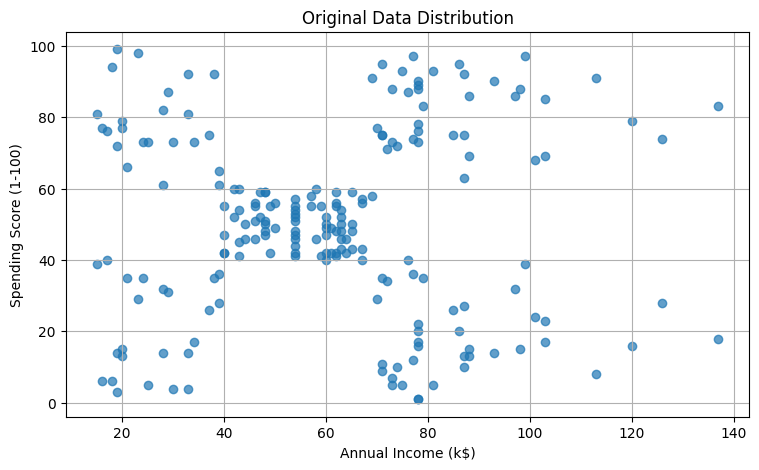

In [ ]:

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(30,5))

plt.subplot(1, 3, 1)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.7)
plt.title('Original Data Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)


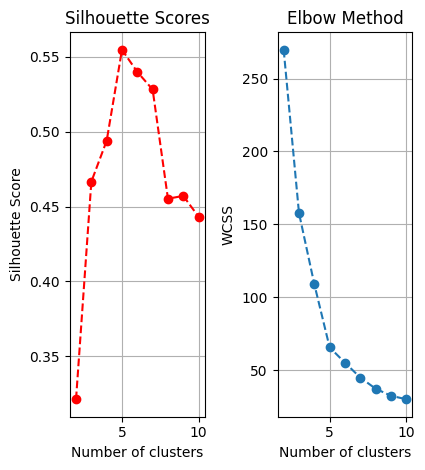

In [ ]:

wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


plt.subplot(1, 3, 2)
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)


plt.subplot(1, 3, 3)
plt.plot(k_range, silhouette_scores, marker='o', color='red', linestyle='--')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

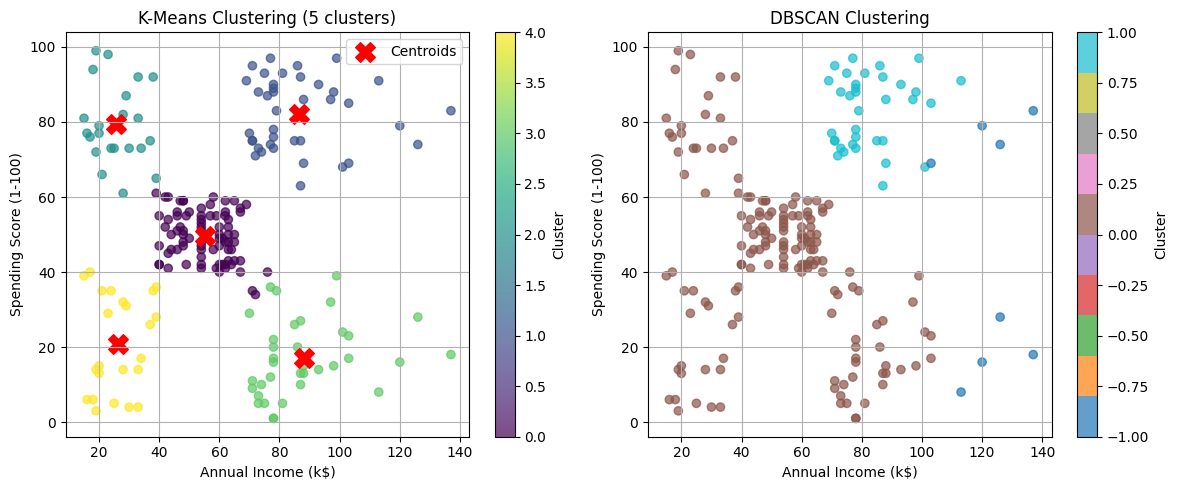


CLUSTER ANALYSIS - K-MEANS
                Income_Mean  Income_Std  Count  Spending_Mean  Spending_Std  \
Cluster_KMeans                                                                
0                     55.30        8.99     81          49.52          6.53   
1                     86.54       16.31     39          82.13          9.36   
2                     25.73        7.57     22          79.36         10.50   
3                     88.20       16.40     35          17.11          9.95   
4                     26.30        7.89     23          20.91         13.02   

                Age_Mean Most_Common_Gender  
Cluster_KMeans                               
0                  42.72             Female  
1                  32.69             Female  
2                  25.27             Female  
3                  41.11               Male  
4                  45.22             Female  

CLUSTER INTERPRETATION
Cluster 0: Low Income, Low Spenders - Budget-conscious customers (81 cus

In [ ]:

optimal_k = 5  

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=df['Cluster_KMeans'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clustering (5 clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)

centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers_original[:, 0], centers_original[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.legend()

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

plt.subplot(1, 2, 2)
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=df['Cluster_DBSCAN'], cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)

plt.tight_layout()
plt.show()


print("\n" + "="*50)
print("CLUSTER ANALYSIS - K-MEANS")
print("="*50)

cluster_analysis = df.groupby('Cluster_KMeans').agg({
    'Annual Income (k$)': ['mean', 'std', 'count'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Age': 'mean',
    'Genre': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
}).round(2)

cluster_analysis.columns = ['Income_Mean', 'Income_Std', 'Count', 
                           'Spending_Mean', 'Spending_Std', 
                           'Age_Mean', 'Most_Common_Gender']

print(cluster_analysis)


print("\n" + "="*50)
print("CLUSTER INTERPRETATION")
print("="*50)
cluster_interpretation = {
    0: "Low Income, Low Spenders - Budget-conscious customers",
    1: "High Income, Low Spenders - Conservative spenders",
    2: "Medium Income, Medium Spenders - Average customers",
    3: "Low Income, High Spenders - Carefree spenders",
    4: "High Income, High Spenders - Premium customers"
}

for cluster_id, interpretation in cluster_interpretation.items():
    if cluster_id in cluster_analysis.index:
        count = cluster_analysis.loc[cluster_id, 'Count']
        print(f"Cluster {cluster_id}: {interpretation} ({count} customers)")

print("\n" + "="*50)
print("CLUSTERING ALGORITHM COMPARISON")
print("="*50)
print(f"K-Means Silhouette Score: {silhouette_score(X_scaled, df['Cluster_KMeans']):.3f}")
print(f"DBSCAN Silhouette Score: {silhouette_score(X_scaled, df['Cluster_DBSCAN']):.3f}")
print(f"Number of clusters (K-Means): {df['Cluster_KMeans'].nunique()}")
print(f"Number of clusters (DBSCAN): {df['Cluster_DBSCAN'].nunique() - 1}")  # -1 for noise
print(f"Noise points in DBSCAN: {(df['Cluster_DBSCAN'] == -1).sum()}")

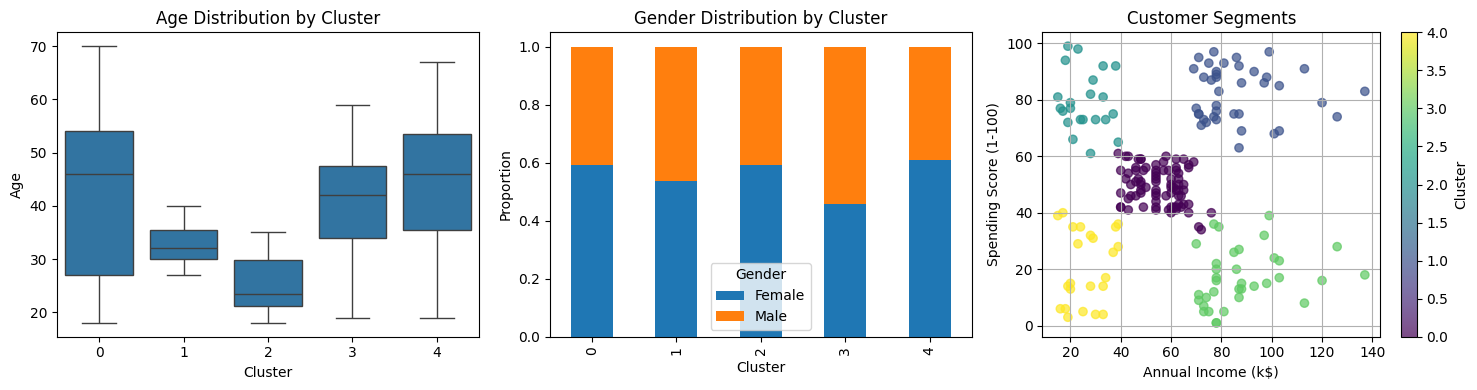


SUMMARY STATISTICS BY CLUSTER
               Annual Income (k$)          Spending Score (1-100)          \
                             mean min  max                   mean min max   
Cluster_KMeans                                                              
0                           55.30  39   76                  49.52  34  61   
1                           86.54  69  137                  82.13  63  97   
2                           25.73  15   39                  79.36  61  99   
3                           88.20  70  137                  17.11   1  39   
4                           26.30  15   39                  20.91   3  40   

                  Age  
                 mean  
Cluster_KMeans         
0               42.72  
1               32.69  
2               25.27  
3               41.11  
4               45.22  


In [ ]:

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster_KMeans', y='Age', data=df)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')


plt.subplot(1, 3, 2)
gender_cluster = pd.crosstab(df['Cluster_KMeans'], df['Genre'], normalize='index')
gender_cluster.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Gender')

plt.subplot(1, 3, 3)
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=df['Cluster_KMeans'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("SUMMARY STATISTICS BY CLUSTER")
print("="*50)

summary_stats = df.groupby('Cluster_KMeans').agg({
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'Age': 'mean'
}).round(2)

print(summary_stats)